In [5]:
import struct
from struct import *
import numpy as np
from array import array
import matplotlib.pyplot as plt
import numpy.linalg as LA
import pandas as pd
from math import pi, sqrt, exp

In [6]:
def writeExcelData(x,excelfile,sheetname,startrow,startcol):
    from pandas import DataFrame, ExcelWriter
    from openpyxl import load_workbook
    df=DataFrame(x)
    book = load_workbook(excelfile)
    writer = ExcelWriter(excelfile, engine='openpyxl') 
    writer.book = book
    writer.sheets = dict((ws.title, ws) for ws in book.worksheets)
    df.to_excel(writer, sheet_name=sheetname,startrow=startrow-1, startcol=startcol-1, header=False, index=False)
    writer.save()
    writer.close()


def load_mnist(dataset = 'training', selecteddigits = [0,5], path = '/Users/Jerry/Desktop/ml/sklearn/'):
    if dataset == 'training':
        fname_digits = path + 'train-images-idx3-ubyte'
        fname_labels = path + 'train-labels-idx1-ubyte'
    elif dataset == 'testing':
        fname_digits = path + 't10k-images-idx3-ubyte'
        fname_labels = path + 't10k-labels-idx1-ubyte'
    else:
        raise ValueError('Must be training or testing')
        
    digitsfileobject = open(fname_digits, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII",digitsfileobject.read(16))
    digitsdata = array('B',digitsfileobject.read())
    digitsfileobject.close()
    
    labelsfileobject = open(fname_labels, 'rb')
    magic_nr, size  = struct.unpack('>II',labelsfileobject.read(8))
    labelsdata = array('B', labelsfileobject.read())
    labelsfileobject.close()
    
    indices = [i for i in range(size) if labelsdata[i] in selecteddigits]
    N = len(indices)

    X = np.zeros(shape = (N,rows*cols), dtype = np.uint8)
    T = np.zeros(shape = (N,1), dtype = np.uint8)
    
    for i in range(N):
        X[i] = digitsdata[indices[i]*rows*cols:(indices[i]+1)*rows*cols]
        #print(len(X[i]))
        T[i] = labelsdata[indices[i]]
    #print(indices[i], rows, cols, indices[i]+1)
    return X,T


def vector2image(v, show = True):
    v = v.reshape(28,28)
    plt.imshow(v,cmap = 'gray')
    plt.axis('off')
    if show:
        plt.show()

def vectortoimg(*args, width = 28, size = 1):
    n = len(args)
    fig = plt.figure()
    for i, arg in enumerate(args):
        plt.subplot(1,n,i+1)
        plt.imshow(arg.reshape(width, width), interpolation = 'None', cmap = 'gray')
        plt.axis('off')
    fig.tight_layout(pad = 0)
    fig.set_size_inches(w=n*size, h = size)
    plt.show()

def classifier_2dhist(queries, HP, HN, pmax, pmin): 
    bins_index = HP.shape - np.array([1,1])
    queries_index = np.clip(np.round((queries-pmin)/(pmax-pmin) * np.alen(HP)) , 0 ,np.alen(HP)-1 ).astype('int32')
    resultlabel = np.full(shape = np.alen(queries[0]), fill_value = 'Indeterminate').astype('object')
    resultpro = np.full(shape = np.alen(queries[0]), fill_value = np.nan).astype('object')
    countP = HP[queries_index[0],queries_index[1]]
    countN = HN[queries_index[0],queries_index[1]]
    IndexResultlableP = countP>countN
    IndexResultlableN = countN>countP
    resultlabel[IndexResultlableP] = 'Positive'
    resultlabel[IndexResultlableN] = 'Negative'
    if countP > countN:
        resultpro = countP / (countP + countN)
    elif countP == countN:
        resultpro = 0.5
    else:
        resultpro = countN / (countP + countN)
    return resultlabel, resultpro
    

In [7]:
ls

PCA.html                 scatterplot_0_5.png      train-images-idx3-ubyte
PCA.ipynb                t10k-images-idx3-ubyte   train-labels-idx1-ubyte
data3.xlsx               t10k-labels-idx1-ubyte   ~$data3.xlsx


In [8]:
# training
T, L = load_mnist('training', selecteddigits=[0, 5])

In [9]:
label0 = L[ L == 0] #Negative 
label5 = L[ L == 5] #Positive


Shape of the X >  (11344, 784)
Shape of the mu >  (784,)
Two image from X > 


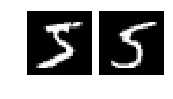

In [10]:
# T is image, L is label
# X      XZCVPR
X = T
mu = np.mean(X, axis = 0)
print('Shape of the X > ',X.shape)
print('Shape of the mu > ',mu.shape) 
print('Two image from X > ')
plt.close('all')
vectortoimg(X[0], X[-1])


Check the min and max of the mu >  min:0.0, max:178.888311001    they need to lie within[0,255]
Show the image of mu > 


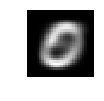

+------+------+------+------+------+
Shape of the Z >  (11344, 784)
Z's mean >  5.46492671469e-16
Show the min max of the Z > min:-178.888311001, max:254.977521157


In [11]:
# Z      XZCVPR
Z = X-mu
print('Check the min and max of the mu > ','min:%s, max:%s'%(np.min(mu),np.max(mu)), '   they need to lie within[0,255]')
print('Show the image of mu > ')
vectortoimg(mu)
print('+------+------+------+------+------+')
print('Shape of the Z > ',Z.shape)
print('Z\'s mean > ', Z.mean())
print('Show the min max of the Z > min:%s, max:%s'%(np.min(Z),np.max(Z)))

The shape of the Covariance matrix >  (784, 784)
Image of the Covariance Matrix > 


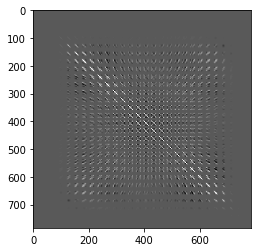

In [12]:
#C      XZCVPR
C = np.cov(X, rowvar = False)
print('The shape of the Covariance matrix > ',C.shape)
print('Image of the Covariance Matrix > ')
plt.imshow(C, cmap = 'gray')
plt.show()


Check which first row or first col is eighen vector > 

Unique values in matrx >  [-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

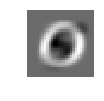

In [13]:
#V      XZCVPR
V_value, V_vector = LA.eigh(C)
V_value = np.flipud(V_value)
V_vector = np.flipud(V_vector.T)
print('Check which first row or first col is eighen vector > \n')
matrx = np.dot(C, V_vector[0,:]) - V_vector[0,:]*V_value[0]
print('Unique values in matrx > ',np.round(np.unique(matrx)))
print('Now we know that first row of the matrx is our eighen vector!')
TwoRowVector = V_vector[0:2,:].copy()
plt.close('all')
print('Here is the image produced from two row eighen vector')
vectortoimg(TwoRowVector[0])



Dimension of P >  (11344, 2)
Plotting the negative image and positive imamge > 


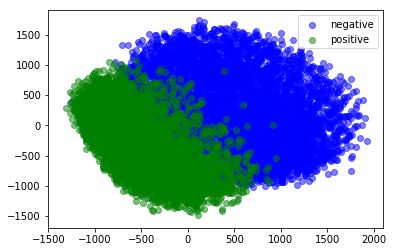

<module 'matplotlib.pyplot' from '/Users/Jerry/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>


In [14]:
#P      XZCVPR
P = np.dot(Z,V_vector.T )
TwoRowMatrix_P = P[:,0:2].copy()
print('Dimension of P > ', TwoRowMatrix_P.shape)
P_df = pd.DataFrame({'1D':TwoRowMatrix_P[:,0],'2D':TwoRowMatrix_P[:,1]})
P_df_negative = P_df[ L == 0 ]
P_df_positive = P_df[ L == 5 ]
print('Plotting the negative image and positive imamge > ')
plt.scatter(x = P_df_negative['1D'], y = P_df_negative['2D'], label = 'negative', c = 'b', alpha = 0.5)
plt.scatter(x = P_df_positive['1D'], y = P_df_positive['2D'], label = 'positive', c = 'green', alpha = 0.5)
plt.legend()
plt.savefig('scatterplot_0_5.png')
plt.show()

print(plt)

In [15]:
print(X.shape)
print(L.shape) 
pos_P = (L == 5)
pos_P = pos_P[:,0]
pos_N = (L == 0)
pos_N = pos_N[:,0]
X[pos_P,:]

(11344, 784)
(11344, 1)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
# Fill in the excel 
print('µ > ', mu.shape)
First_V = TwoRowVector[0,:]
Second_V = TwoRowVector[1,:]
print('First eighen vector > ',TwoRowVector[0,:].shape)
print('Second eighen vector > ', TwoRowVector[1,:].shape)
number_p = len(label5)   #number of sample for positive number
number_n = len(label0)   #number of sample for negative number
print('Number of sample > positive:%s, negative:%s' %(number_p,number_n))

pos_P = (L == 5)
pos_P = pos_P[:,0]
pos_N = (L == 0)
pos_N = pos_N[:,0]
P_positive = TwoRowMatrix_P[pos_P,:]
P_negative = TwoRowMatrix_P[pos_N,:]
P_positive_mu = np.mean(P_positive, axis = 0)
P_negative_mu = np.mean(P_negative, axis = 0)
print('mup > ',P_positive_mu)
print('mun > ',P_negative_mu)
Covariance_P_Positive =  np.cov(P_positive, rowvar = False)
Covariance_P_Negative =  np.cov(P_negative, rowvar = False)
print('cp (class +1 covariance matrix) >')
print(Covariance_P_Positive, '\n')
print('cp (class -1 covariance matrix) >')
print(Covariance_P_Negative)

TwoRowMatrix_P_max = np.max(P_positive)
TwoRowMatrix_P_min = np.min(P_positive)
TwoRowMatrix_N_max = np.max(P_negative)
TwoRowMatrix_N_min = np.min(P_negative)
print('Histogram range, pc1 direction > min:%s, max:%s '%(TwoRowMatrix_P_min,TwoRowMatrix_P_max) )
print('Histogram range, pc2 direction > min:%s, max:%s '%(TwoRowMatrix_N_max,TwoRowMatrix_N_min) )

µ >  (784,)
First eighen vector >  (784,)
Second eighen vector >  (784,)
Number of sample > positive:5421, negative:5923
mup >  [-525.96791221 -242.70083303]
mun >  [ 481.38984502  222.1308823 ]
cp (class +1 covariance matrix) >
[[ 171963.66026279 -143062.14643749]
 [-143062.14643749  284280.06497111]] 

cp (class -1 covariance matrix) >
[[ 358704.2833126   -92868.09272626]
 [ -92868.09272626  400027.06901261]]
Histogram range, pc1 direction > min:-1490.38932527, max:1082.02106063 
Histogram range, pc2 direction > min:1930.81947098, max:-1258.4658513 


In [17]:
ls

PCA.html                 scatterplot_0_5.png      train-images-idx3-ubyte
PCA.ipynb                t10k-images-idx3-ubyte   train-labels-idx1-ubyte
data3.xlsx               t10k-labels-idx1-ubyte   ~$data3.xlsx


In [18]:
# excel export 
import pandas as pd
writeExcelData(x = pd.DataFrame(mu).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 2, startcol = 2 )
writeExcelData(x = pd.DataFrame(First_V).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 3, startcol = 2 )
writeExcelData(x = pd.DataFrame(Second_V).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 4, startcol = 2 )
writeExcelData(x = pd.DataFrame(np.array([number_p])), excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 6, startcol = 2 )
writeExcelData(x = pd.DataFrame(np.array([number_n])), excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 7, startcol = 2 )
writeExcelData(x = pd.DataFrame(P_positive_mu).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 9, startcol = 2 )
writeExcelData(x = pd.DataFrame(P_negative_mu).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 10, startcol = 2 )
writeExcelData(x = Covariance_P_Positive, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 12, startcol = 2 )
writeExcelData(x = Covariance_P_Negative, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 14, startcol = 2 )

pc1 = pd.DataFrame([TwoRowMatrix_P_min,TwoRowMatrix_P_max]).T
pc2 = pd.DataFrame([TwoRowMatrix_N_min,TwoRowMatrix_N_max]).T
writeExcelData(x = pc1, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 17, startcol = 2 )
writeExcelData(x = pc2, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 18, startcol = 2 )





In [19]:
def hist_2d(x, xmin, xmax, labels, xbin = np.array([32,32])):
    HP = np.zeros(shape = xbin).astype('int32')
    HN = np.zeros(shape = xbin).astype('int32')
    
    to_which_bins = np.round( ((x-xmin) / (xmax-xmin)) * ( xbin-np.array([1,1] ) )).astype('int32') 
    
    for vector, label in zip(to_which_bins, labels):
        positive = 5
        negative = 0
        if label == positive:
            HP[vector[0],vector[1]]+=1
        else:
            HN[vector[0],vector[1]]+=1
    
    return HP, HN
    
TwoRowMatrix_P.shape
TwoRowMatrix_P_max = np.max(TwoRowMatrix_P,axis = 0)
TwoRowMatrix_P_min = np.min(TwoRowMatrix_P,axis = 0)
HP, HN = hist_2d(x = TwoRowMatrix_P, xmin = TwoRowMatrix_P_min, xmax = TwoRowMatrix_P_max, xbin = (32,32), labels = L)
writeExcelData(x = HP, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 20, startcol = 2 )
writeExcelData(x = HN, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 53, startcol = 2 )

In [20]:
def classifier_2dhist(queries, HP, HN, pmax, pmin): 
    bins_index = HP.shape - np.array([1,1])
    queries_index = np.clip(np.round((queries-pmin)/(pmax-pmin) * np.alen(HP)) , 0 ,np.alen(HP)-1 ).astype('int32')
    resultlabel = np.full(shape = np.alen(queries[0]), fill_value = 'Indeterminate').astype('object')
    resultpro = np.full(shape = np.alen(queries[0]), fill_value = np.nan).astype('object')
    countP = HP[queries_index[0],queries_index[1]]
    countN = HN[queries_index[0],queries_index[1]]
    IndexResultlableP = countP>countN
    IndexResultlableN = countN>countP
    resultlabel[IndexResultlableP] = 'Positive'
    resultlabel[IndexResultlableN] = 'Negative'
    if countP > countN:
        resultpro = countP / (countP + countN)
    elif countP == countN:
        resultpro = 0.5
    else:
        resultpro = countN / (countP + countN)
    return resultlabel, resultpro

Pmax = np.max(TwoRowMatrix_P ,axis = 0)
Pmin = np.min(TwoRowMatrix_P ,axis = 0)
queryP = P_df_positive.values
queryN = P_df_negative.values
classifier_2dhist(queries = queryP[32], HP = HP, HN = HN, pmax = Pmax, pmin = Pmin)
allimg_hist = [classifier_2dhist(queries = queryP[i], HP = HP, HN = HN, pmax = Pmax, pmin = Pmin) for i in range(0,len(queryP))]



In [21]:

def bayesian2(x, meanP, meanN, covP, covN, sizeP, sizeN):
    P = (1/2*pi*sqrt(np.linalg.det(covP))) * exp(-0.5 * ((x-meanP).dot(np.linalg.inv(covP))).dot(np.transpose(x-meanP)))
    N = (1/2*pi*sqrt(np.linalg.det(covN))) * exp(-0.5 *    np.dot( np.dot((x-meanN), np.linalg.inv(covN)), np.transpose(x-meanN) ) )
    if P > N:
        pro = sizeP*P/(sizeP*P+sizeN*N)
        resultlable = 'Positive'
    elif P==N:
        pro = np.nan
        resultlable = 'Indeterminate'
    else:
        pro = sizeN*N/(sizeP*P+sizeN*N)
        resultlable = 'Negative'
    return resultlable,pro
P_mean_P = np.mean(queryP, axis = 0 )
P_mean_N = np.mean(queryN, axis = 0 )
bayesian2(x = queryP[7], meanP = P_mean_P , meanN = P_mean_N, 
          covP = Covariance_P_Positive, covN = Covariance_P_Negative, 
          sizeP = number_p , sizeN = number_n)
allimg_baye = [bayesian2(x = queryP[i], meanP = P_mean_P , meanN = P_mean_N, 
          covP = Covariance_P_Positive, covN = Covariance_P_Negative, 
          sizeP = number_p , sizeN = number_n) for i in range(len(queryP))]




In [22]:
# testing
#X   XZCVPR
T_test, L_test = load_mnist(dataset = 'testing')

X = T_test 
X_min = np.min(X, axis = 0)
X_max = np.max(X, axis = 0)

posP = L_test==5
posP=posP[:,0]
posN = L_test==0
posN=posN[:,0]
XP = X[ posP, : ].copy()
XN = X[ posN, : ].copy()

X_mu = np.mean(X,axis = 0)
XP_mu = np.mean(XP, axis = 0)
XN_mu = np.mean(XN, axis = 0)

OneRowXP = XP[-1]
OneRowXN = XN[-1]


In [23]:
#Z   XZCVPR
Z = X - X_mu
ZP = Z[ posP, : ].copy()
ZN = Z[ posN, : ].copy()
ZP_center = np.mean(ZP, axis = 0) 
ZN_center = np.mean(ZN, axis = 0)

In [24]:
#C   XZCVPR
C = np.cov(Z, rowvar = False)

In [25]:
#V   XZCVPR
V_value, V_vector = LA.eigh(C)
V_value = np.flipud(V_value)
V_vector = np.flipud(V_vector.T)
print('Test if the first row is eigh vector > ')
print(np.unique(np.round( np.dot(C, V_vector[0,:]) - V_vector[0,:]*V_value[0] )))
print('It is!')
TwoRow_V_vector = V_vector[0:2,:].copy()
TwoRow_V_vector.shape

Test if the first row is eigh vector > 
[ 0.]
It is!


(2, 784)

In [26]:
#P   XZCVPR
P = np.dot(Z,V_vector.T)
TwoCol_P = np.dot(Z,TwoRow_V_vector.T)
TwoCol_PP = TwoCol_P[ posP, : ].copy()
TwoCol_PN = TwoCol_P[ posN, : ].copy()
OneRowTwoCol_PP = TwoCol_PP[2]
OneRowTwoCol_PN = TwoCol_PN[2]


In [27]:
#R   XZCVPR
R = np.dot(P, V_vector)
print('Test if R - X is close to zero > ', np.unique(np.round(R-Z)))
RP = R[posP,:].copy()
RN = R[posN,:].copy()
OneRowRP = RP[11]
OneRowRN = RN[11]
OneRowRP.shape

Test if R - X is close to zero >  [ 0.]


(784,)

In [28]:
#xrec   XZCVPR
xrec = R + X_mu;print(np.unique(np.round(xrec - X)))
xrecp = xrec[ posP,: ]
xrecn = xrec[posN,:]
OneRowXrecp = xrecp[7]
OneRowXrecn = xrecn[7]


[ 0.]


In [29]:
# accuracy for testing set

In [30]:
#TwoCol_P.shape
#TwoCol_PP.shape
#TwoCol_PN.shape
TwoCol_P_max = np.max(TwoCol_P)
TwoCol_P_min = np.min(TwoCol_P)

#positive_histogram
p_label,p_pro = classifier_2dhist(queries = OneRowTwoCol_PP, HP = HP, HN = HN, pmax = TwoCol_P_max, pmin = TwoCol_P_min)
p_pro = str(p_pro * 100)+'%'
#negative_histogram
n_label, n_pro = classifier_2dhist(queries = OneRowTwoCol_PN, HP = HP, HN = HN, pmax = TwoCol_P_max, pmin = TwoCol_P_min)
n_pro = str(n_pro * 100)+'%'

print('+------+-------Hitogram-------+------')
print('Input as positive > ',p_label[0], p_pro)
print('Input as negative > ',n_label[0], n_pro,'\n')




print('+------+-------Baysian-------+------')



#positive_bay
p_label1, p_pro1 = bayesian2(x = TwoCol_PP[10], meanP = np.mean(TwoCol_PP,axis = 0), 
                             meanN = np.mean(TwoCol_PN,axis = 0), 
                             covP = np.cov(TwoCol_PP,rowvar = False), covN = np.cov(TwoCol_PN,rowvar = False), 
                             sizeP = len(TwoCol_PP), sizeN = len(TwoCol_PN))
p_pro1 = str(p_pro1*100)+'%'
#negative_bay
n_label1, n_pro1 = bayesian2(x = TwoCol_PN[10], meanP = np.mean(TwoCol_PP,axis = 0), 
                             meanN = np.mean(TwoCol_PN,axis = 0), 
                             covP = np.cov(TwoCol_PP,rowvar = False), covN = np.cov(TwoCol_PN,rowvar = False), 
                             sizeP = len(TwoCol_PP), sizeN = len(TwoCol_PN))
n_pro1 = str(n_pro1*100)+'%'


print('Input as positive > ',p_label1, p_pro1)
print('Input as negative > ',n_label1, n_pro1)

+------+-------Hitogram-------+------
Input as positive >  Positive 96.3636363636%
Input as negative >  Negative 84.0% 

+------+-------Baysian-------+------
Input as positive >  Positive 88.70199432669922%
Input as negative >  Negative 80.68512687838016%


In [31]:
# accuracy
predictive_label_hist = list()
for v in TwoCol_P:
    a,b = classifier_2dhist(queries = v, HP = HP, HN = HN, pmax = TwoCol_P_max, pmin = TwoCol_P_min)
    predictive_label_hist.append(a[0])
predictive_label_hist

actual_label = list()
for i in L_test:
    if i[0] == 0:
        actual_label.append('Negative')
    elif i[0] == 5:
        actual_label.append('Positive')

predictive_label_hist = np.array(predictive_label_hist)
actual_label = np.array(actual_label)
resut = (predictive_label_hist == actual_label)
true = resut[ resut==True ]
false = resut[ resut == False ]
result_accuracy_hist = len(true)/(len(true) + len(false))
result_accuracy_hist = str(result_accuracy_hist * 100) + '%'
print('Testing accuracy attained using histograms > ',result_accuracy_hist)

Testing accuracy attained using histograms >  86.37820512820514%


In [32]:
meanP = np.mean(TwoCol_PP, axis = 0)
meanN = np.mean(TwoCol_PN, axis = 0)
covP = np.cov(TwoCol_PP,rowvar = False)
covN = np.cov(TwoCol_PN,rowvar = False)
sizeP = len(TwoCol_PP)
sizeN = len(TwoCol_PN)

predictive_label_bay = list()
for v in TwoCol_P:
    a,b = bayesian2(x = v, meanP = meanP, meanN = meanN, covP = covP, covN = covN, sizeP = sizeP, sizeN = sizeN)
    predictive_label_bay.append(a)
predictive_label_bay = np.array(predictive_label_bay)
resut1 = (predictive_label_bay == actual_label )
true1 = resut1[ resut1==True  ]
false1 = resut1[ resut1 == False ]
result_accuracy_bay = len(true1)/(len(true1)+len(false1))
result_accuracy_bay = str(result_accuracy_bay * 100) + '%'
print('Testing accuracy attained using Bayesian > ', result_accuracy_bay)


Testing accuracy attained using Bayesian >  89.58333333333334%


In [33]:
# excel export 


In [34]:
writeExcelData(x = pd.DataFrame(OneRowXP).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 88, startcol = 2 )
writeExcelData(x = pd.DataFrame(OneRowXN).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 94, startcol = 2 )
writeExcelData(x = pd.DataFrame(ZP_center).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 89, startcol = 2 )
writeExcelData(x = pd.DataFrame(ZN_center).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 95, startcol = 2 )
writeExcelData(x = pd.DataFrame(OneRowTwoCol_PP).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 90, startcol = 2 )
writeExcelData(x = pd.DataFrame(OneRowTwoCol_PN).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 96, startcol = 2 )
writeExcelData(x = pd.DataFrame(OneRowRP).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 91, startcol = 2 )
writeExcelData(x = pd.DataFrame(OneRowRN).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 97, startcol = 2 )
writeExcelData(x = pd.DataFrame(OneRowXrecp).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 92, startcol = 2 )
writeExcelData(x = pd.DataFrame(OneRowXrecn).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 98, startcol = 2 )

writeExcelData(x = pd.DataFrame([p_label[0], p_pro]).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 103, startcol = 2 )
writeExcelData(x = pd.DataFrame([n_label[0], n_pro]).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 104, startcol = 2 )
writeExcelData(x = pd.DataFrame([p_label1, p_pro1]).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 107, startcol = 2 )
writeExcelData(x = pd.DataFrame([n_label1, n_pro1]).T, excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 108, startcol = 2 )
writeExcelData(x = pd.DataFrame(np.array([result_accuracy_hist])), excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 111, startcol = 2 )
writeExcelData(x = pd.DataFrame(np.array([result_accuracy_bay])), excelfile = 'data3.xlsx', sheetname = 'Results', startrow = 112, startcol = 2 )
